<a href="https://colab.research.google.com/github/ibombonato/aicrowd-blitz-faceimages/blob/main/C%C3%B3pia_de_Getting_Starter_Notebook_for_Mask_Recognition_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Feb 21 14:34:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

![](https://images.aicrowd.com/raw_images/challenges/banner_file/1020/efe95338563ab47dda7e.png)

<h2><center> Getting Started with Mask Recognition Challenge</center></h2>

In this puzzle, we have detect mask type and bounding box of the mask from the image of human face. 

This is a starter kit explaining how to download the data and also submit direcly via this notebook. 

We will be submitting the sample prediction directly in the required format.



 AIcrowd code utilities for downloading data for Language Classification


# Download the files 💾¶
## Download AIcrowd CLI

We will first install aicrowd-cli which will help you download and later make submission directly via the notebook.


In [ ]:
!pip install aicrowd-cli

In [ ]:
!pip install --upgrade fastai

In [ ]:
!pip install lightning-flash[all]

In [ ]:
!pip install icevision[all]

In [ ]:
!pip install fiftyone

In [92]:
# # Torch - Torchvision - IceVision - IceData - MMDetection - YOLOv5 - EfficientDet Installation
# !wget https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh

# # Choose your installation target: cuda11 or cuda10 or cpu
# !bash icevision_install.sh cuda11

--2022-02-21 16:44:57--  https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2691 (2.6K) [text/plain]
Saving to: ‘icevision_install.sh’

icevision_install.s 100%[===================>]   2.63K  --.-KB/s    in 0s      

2022-02-21 16:44:58 (43.9 MB/s) - ‘icevision_install.sh’ saved [2691/2691]

Installing icevision + dependencices for cuda11
- Installing torch and its dependencies
Looking in links: https://download.pytorch.org/whl/torch_stable.html
- Installing mmcv
     |████████████████████████████████| 51.3 MB 168 kB/s 
     |████████████████████████████████| 190 kB 4.2 MB/s 
- Installing mmdet
     |████████████████████████████████| 1.2 MB 5.1 MB/s 
- Installing icevision from PyPi

In [16]:
!pip install fiftyone-db-ubuntu1604

     |████████████████████████████████| 29.2 MB 1.4 MB/s 


In [18]:
!pip install pymongo

In [93]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'restart': True, 'status': 'ok'}


## Login to AIcrowd ㊗¶


In [ ]:
%load_ext aicrowd.magic
%aicrowd login


## Download Dataset¶

We will create a folder name data and download the files there.


In [2]:
!rm -rf data
!mkdir data
%aicrowd ds dl -c mask-prediction -o data

sample_submission.csv:   0%|          | 0.00/44.0k [00:00<?, ?B/s]

test.zip:   0%|          | 0.00/115M [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/193k [00:00<?, ?B/s]

train.zip:   0%|          | 0.00/318M [00:00<?, ?B/s]

val.csv:   0%|          | 0.00/82.8k [00:00<?, ?B/s]

val.zip:   0%|          | 0.00/137M [00:00<?, ?B/s]

In [3]:
!unzip data/train.zip -d data/train > /dev/null
!unzip data/val.zip -d data/val > /dev/null
!unzip data/test.zip -d data/test > /dev/null

## Diving in the dataset 🕵️‍♂️

In [2]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from tqdm.auto import tqdm
import shutil
from ast import literal_eval
tqdm.pandas()

## Diving in the dataset 🕵️‍♂️

In [3]:
train_images = 'data/train'
val_images = 'data/val'
test_images = 'data/test'

In [97]:
train_df = pd.read_csv("data/train.csv")
val_df = pd.read_csv("data/val.csv")

In [98]:
IMAGE_DIMS = (512, 512)

def format_bbox(annotation):
    xmin, ymin, xmax, ymax = annotation[0], annotation[1], annotation[2], annotation[3]
    width = xmax - xmin
    height = ymax - ymin
    return [{"xmin": xmin, "ymin": ymin, "width": width, "height": height}]

# def format_bbox(annotation):
#     xmin, ymin, width, height = annotation[0], annotation[1], annotation[2], annotation[3]
#     return {"xmin": xmin, "ymin": ymin, "xmax": width, "ymax": height}

def make_df(df, path):
  df['bbox_list'] = [literal_eval(box) for box in df['bbox'].values]
  df['bbox_coco'] = df['bbox_list'].apply(lambda x: format_bbox(x)) 
  #df['masktype']  = df['masktype'].apply(lambda x: [x])
  df['image']     = df['ImageID'].apply(lambda x: f"{path}/{x}.jpg")
  return df

In [99]:
train_df = make_df(train_df, "/content/data/train/train")

In [100]:
val_df = make_df(val_df, "/content/data/val/val")

In [101]:
train_df.head()

,ImageID,bbox,masktype,bbox_list,bbox_coco,image
0,k8o0f,"[73, 197, 293, 400]",N95,"[73, 197, 293, 400]","[{'xmin': 73, 'ymin': 197, 'width': 220, 'height': 203}]",/content/data/train/train/k8o0f.jpg
1,7a0l9,"[47, 364, 300, 512]",surgical,"[47, 364, 300, 512]","[{'xmin': 47, 'ymin': 364, 'width': 253, 'height': 148}]",/content/data/train/train/7a0l9.jpg
2,wfp7p,"[203, 221, 380, 403]",N95,"[203, 221, 380, 403]","[{'xmin': 203, 'ymin': 221, 'width': 177, 'height': 182}]",/content/data/train/train/wfp7p.jpg
3,7qaw6,"[87, 210, 322, 385]",surgical,"[87, 210, 322, 385]","[{'xmin': 87, 'ymin': 210, 'width': 235, 'height': 175}]",/content/data/train/train/7qaw6.jpg
4,i4kqj,"[227, 283, 479, 475]",surgical,"[227, 283, 479, 475]","[{'xmin': 227, 'ymin': 283, 'width': 252, 'height': 192}]",/content/data/train/train/i4kqj.jpg


In [ ]:
val_df.head()

In [55]:
from fastai.vision.all import *

In [40]:
def get_annotations_custom(df):
  imgs = df['ImageID'].apply(lambda x: f"/content/data/train/train/{x}.jpg")
  lbl_bbox = df.apply(lambda row: ([row['bbox_list']], row['masktype']), axis=1)
  return imgs, lbl_bbox

In [41]:
imgs, lbl_bbox = get_annotations_custom(train_df)

In [42]:
imgs[0]

'/content/data/train/train/k8o0f.jpg'

In [43]:
lbl_bbox[0]

([[73, 197, 293, 400]], ['N95'])

In [44]:
img2bbox = dict(zip(imgs, lbl_bbox))

In [45]:
first = {k: img2bbox[k] for k in list(img2bbox)[:1]}; first

{'/content/data/train/train/k8o0f.jpg': ([[73, 197, 293, 400]], ['N95'])}

In [46]:
getters = [lambda o: o, lambda o: img2bbox[o][0], lambda o: img2bbox[o][1]]

In [47]:
item_tfms = [Resize(128, method='pad'),]
batch_tfms = [Rotate(), Flip(), Dihedral(), Normalize.from_stats(*imagenet_stats)]

In [48]:
def get_train_imgs(noop):  return imgs

In [49]:
mask_dl = DataBlock(blocks=(ImageBlock, BBoxBlock, BBoxLblBlock),
                 splitter=RandomSplitter(),
                 get_items=get_train_imgs,
                 getters=getters,
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms,
                 n_inp=1)

In [51]:
dls = mask_dl.dataloaders('/content/data/train/train')
#dls_val = mask_dl.dataloaders(source = '/content/data/val/val')

In [52]:
dls.c = 20

In [ ]:
dls.show_batch()

In [56]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [85]:
learn.fit_one_cycle(1, 5e-3)

'2.5.3'

In [82]:
def get_labels(df):
  files = df['image']
  labels = df['masktype']
  bboxes = df['bbox_list']
  return files, labels, bboxes

In [69]:
train_files, train_labels, train_bboxes = get_labels(train_df)

In [11]:
train_bboxes

0       [{'xmin': 73, 'ymin': 197, 'width': 293, 'heig...
1       [{'xmin': 47, 'ymin': 364, 'width': 300, 'heig...
2       [{'xmin': 203, 'ymin': 221, 'width': 308, 'hei...
3       [{'xmin': 87, 'ymin': 210, 'width': 322, 'heig...
4       [{'xmin': 227, 'ymin': 283, 'width': 284, 'hei...
                              ...                        
5595    [{'xmin': 0, 'ymin': 374, 'width': 247, 'heigh...
5596    [{'xmin': 112, 'ymin': 325, 'width': 373, 'hei...
5597    [{'xmin': 53, 'ymin': 212, 'width': 238, 'heig...
5598    [{'xmin': 259, 'ymin': 227, 'width': 252, 'hei...
5599    [{'xmin': 240, 'ymin': 271, 'width': 271, 'hei...
Name: bbox_coco, Length: 5600, dtype: object

In [54]:

DATA_DIR = "/content/data/"
IMAGE_DIMS = (512, 512)

def format_bbox(annotation):
    xmin, ymin, width, height = annotation["x"], annotation["y"], annotation["width"], annotation["height"]
    width = IMAGE_DIMS[0] - xmin - 1 if xmin + width >= IMAGE_DIMS[0] else width
    height = IMAGE_DIMS[1] - ymin - 1 if ymin + height >= IMAGE_DIMS[1] else height
    return {"xmin": xmin, "ymin": ymin, "width": width, "height": height}

train_files, train_labels, train_bboxes = [], [], []

for idx, row in train_df.iterrows():
        
    image_path, labels, bboxes = [], [], []
    
    image_path.append(f"/content/data/train/train/{row['masktype']}.jpg")
    labels.append(row["masktype"])
    bboxes.append(row['bbox_coco'])
    
    # Skip images with no annotations
    if labels != []:
        train_files.append(image_path)
        train_labels.append(labels)
        train_bboxes.append(bboxes)



In [13]:
!mkdir /content/fiftyonedb
!chmod 777 /content/fiftyonedb
!export FIFTYONE_DATABASE_DIR=/content/fiftyonedb

In [ ]:
import fiftyone as fo
from flash.image import ObjectDetectionData, ObjectDetector

IMAGE_SIZE = 512

datamodule = ObjectDetectionData.from_files(
    train_files=train_files,
    train_targets=train_labels,
    train_bboxes=train_bboxes,
    val_split=0.15,
    transform_kwargs={"image_size": IMAGE_SIZE},
    batch_size=8,
    num_workers=4,
)

In [ ]:
from pathlib import Path
import os

def create_dirs(labels, splits):
  for split in splits:
    for label in labels:
      os.makedirs(f"/content/images/{split}/{label}/", exist_ok=True)

def image_to_label_folder(img_name, label_directory, split_directory):
  origin = Path(f"/content/data/{split_directory}/{split_directory}/{img_name}.jpg")
  target = Path(f"/content/images/{split_directory}/{label_directory}/{img_name}.jpg")
  shutil.copy(origin, target)

def move_images(df, split):
  df.progress_apply(lambda x: image_to_label_folder(x["ImageID"],x["masktype"], split), axis=1)

In [ ]:
labels = train_df['masktype'].unique()

create_dirs(labels, ["train", "val"])

In [ ]:
move_images(train_df, "train")
move_images(val_df, "val")

  0%|          | 0/5600 [00:00<?, ?it/s]

  0%|          | 0/2400 [00:00<?, ?it/s]

In [ ]:
!pip show ipython

Detecto

In [ ]:
!pip install detecto

In [72]:
!pip install pascal-voc-writer

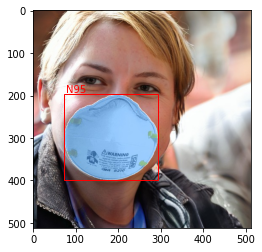

In [71]:
from detecto import utils, visualize, core
import random

#train_files, train_labels, train_bboxes = get_labels(train_df)

boxes=torch.FloatTensor(train_bboxes[0])
image = utils.read_image(train_files[0])
label = train_labels[0]
visualize.show_labeled_image(image, boxes, label)


In [74]:
train_df.head()

,ImageID,bbox,masktype,bbox_list,bbox_coco
0,k8o0f,"[73, 197, 293, 400]",[N95],"[73, 197, 293, 400]","[{'xmin': 73, 'ymin': 197, 'width': 220, 'height': 203}]"
1,7a0l9,"[47, 364, 300, 512]",[surgical],"[47, 364, 300, 512]","[{'xmin': 47, 'ymin': 364, 'width': 253, 'height': 148}]"
2,wfp7p,"[203, 221, 380, 403]",[N95],"[203, 221, 380, 403]","[{'xmin': 203, 'ymin': 221, 'width': 177, 'height': 182}]"
3,7qaw6,"[87, 210, 322, 385]",[surgical],"[87, 210, 322, 385]","[{'xmin': 87, 'ymin': 210, 'width': 235, 'height': 175}]"
4,i4kqj,"[227, 283, 479, 475]",[surgical],"[227, 283, 479, 475]","[{'xmin': 227, 'ymin': 283, 'width': 252, 'height': 192}]"


In [116]:
from pascal_voc_writer import Writer

def create_voc(folder, df):
    files = glob.glob(folder+"/*")
    for i in range(len(files)):
        fid = files[i].replace(folder+'/','').split('.')[0]
        ldf=df[df['ImageID'] == fid].reset_index()
        if len(ldf)> 0:
            width, height = 512, 512
            writer = Writer(fid+'.jpg', width, height)
            for j in range(len(ldf)):
                writer.addObject(ldf['masktype'].iloc[j], 
                                 int(ldf['bbox_list'].iloc[j][0]), 
                                 int(ldf['bbox_list'].iloc[j][1]), 
                                 int(ldf['bbox_list'].iloc[j][2]),
                                 int(ldf['bbox_list'].iloc[j][3]))
            writer.save(folder+'/'+fid+'.xml')

In [117]:
create_voc("/content/data/train/train", train_df)
create_voc("/content/data/val/val", val_df)

In [118]:
LABELS = list(train_df['masktype'].unique())

In [119]:
LABELS

['N95', 'surgical', 'cloth', 'KN95']

In [120]:
dataset = core.Dataset('/content/data/train/train')
loader = core.DataLoader(dataset, batch_size=16, shuffle=True)
val_dataset = core.Dataset('/content/data/val/val')
model = core.Model(LABELS)
losses = model.fit(loader, val_dataset, epochs=2, learning_rate=0.001, lr_step_size=5, verbose=True)
print(losses)

Epoch 1 of 2
Begin iterating over training dataset


100%|██████████| 350/350 [19:28<00:00,  3.34s/it]


Begin iterating over validation dataset


100%|██████████| 2400/2400 [04:05<00:00,  9.77it/s]


Loss: 0.07513388355262578
Epoch 2 of 2
Begin iterating over training dataset


100%|██████████| 350/350 [19:41<00:00,  3.37s/it]


Begin iterating over validation dataset


100%|██████████| 2400/2400 [04:05<00:00,  9.78it/s]

Loss: 0.033200837788172066
[0.07513388355262578, 0.033200837788172066]


In [ ]:
losses = model.fit(loader, val_dataset, epochs=2, learning_rate=0.001, lr_step_size=5, verbose=True)
print(losses)

In [122]:
image = utils.read_image("/content/data/test/test/000x4.jpg")
predictions = model.predict(image)

(['N95'], tensor([[ 78.7289, 316.8411, 265.0085, 505.7220]]), tensor([0.9970]))


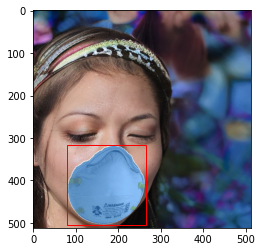

In [124]:
print(predictions)
visualize.show_labeled_image(image, predictions[1])

In [257]:
tfiles = glob.glob("/content/data/test/test/*")
#tfiles= tfiles[-3:]
predf=pd.DataFrame(columns=['ImageID', 'bbox', 'masktype'])
no_counter = 0
for i in tqdm(range(len(tfiles))):
  image = utils.read_image(tfiles[i])
  fid = tfiles[i].replace("/content/data/test/test/",'').split('.')[0]
  predictions = model.predict(image)
  labels, boxes, scores = predictions
  if len(boxes) == 0:
    boxes = Tensor([[0, 0 , 0, 0]])
    labels = ['N95']
    no_counter += 1
  predf=predf.append({'ImageID': fid, 'bbox': list(boxes[0].tolist()), 'masktype': labels[0]}, ignore_index=True)

100%|██████████| 2000/2000 [03:30<00:00,  9.50it/s]


In [258]:
no_counter

1

In [255]:
labels = ['N95']
labels[0]

'N95'

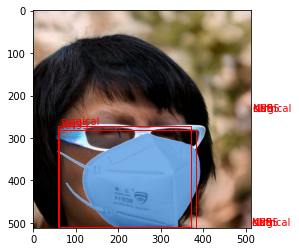

In [223]:
visualize.show_labeled_image(image, boxes, labels)

In [259]:
predf.head()

,ImageID,bbox,masktype
0,hm3nl,"[267.2813720703125, 184.4294891357422, 464.39105224609375, 401.0139465332031]",N95
1,6bbrv,"[146.6544647216797, 298.8544006347656, 435.03045654296875, 512.0]",KN95
2,1sa11,"[184.88023376464844, 228.68084716796875, 449.0040588378906, 395.6533508300781]",KN95
3,astz6,"[180.7456817626953, 367.0509948730469, 416.21624755859375, 512.0]",cloth
4,iaxwc,"[337.0119323730469, 208.51632690429688, 512.0, 392.135498046875]",cloth


In [199]:
from tqdm import tqdm
tqdm.pandas()

def get_preds(image_path):
  print(image_path)
  image = utils.read_image(image_path)
  predictions = model.predict(image)
  label, boxes, _ = predictions
  return label, boxes, image_path

In [ ]:
test_df = pd.read_csv("/content/data/sample_submission.csv")
test_df = make_df(test_df, "/content/data/test/test")
print(test_df.shape)
test_df.head()

In [ ]:
test_df.head()

In [ ]:
print(type(test_df))
print(type(test_df.iloc[[0]]))
print(test_df.iloc[[0]].shape)
print(test_df.iloc[[0]].head())

In [186]:
test_df_preds = make_df_preds(test_df.iloc[[0]])
test_df_preds.head()

100%|██████████| 1/1 [00:00<00:00,  6.71it/s]


0    ([N95], [tensor(73.), tensor(197.), tensor(293.), tensor(400.)])
Name: image, dtype: object

In [183]:
type(test_df_preds)

pandas.core.series.Series

In [202]:
a = test_df.iloc[[0]]['image'].progress_apply(lambda x: get_preds(x))

100%|██████████| 1/1 [00:00<00:00,  6.49it/s]

/content/data/test/test/os9el.jpg


In [211]:
a[0][2]

'/content/data/test/test/os9el.jpg'

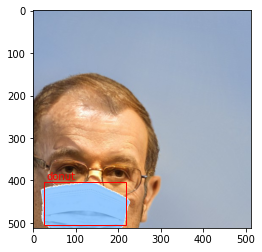

In [63]:
visualize.show_labeled_image(image, boxes[5], labels[5])

## Predicting Mask Type

In [ ]:
from fastai.vision.all import *
path = '/content/images'

dls = ImageDataLoaders.from_folder(
    path, train='train', valid='val', item_tfms=Resize(224), 
                                        batch_tfms=aug_transforms(size=224))

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])
learn.to_fp16()

SuggestedLRs(valley=0.0012022644514217973)

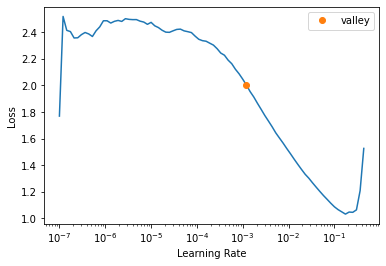

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(3, 0.0012022644514217973)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.589937,0.081890,0.031667,0.968333,01:11


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.047582,0.010307,0.003750,0.996250,01:13
1,0.020195,0.011425,0.003333,0.996667,01:11
2,0.006074,0.009365,0.003333,0.996667,01:12


## Pred Mask

In [ ]:
# Image Reading & Preprocessing
from PIL import Image, ImageDraw
import cv2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
def gen_bounding_boxes_and_mask(img):

  # Converting the image to numpy array 
  np_img = np.array(img)
  gray = cv2.cvtColor(np_img, cv2.COLOR_BGR2GRAY)

  # Getting the edges
  canny = cv2.Canny(gray, 100, 200)

  # Getting the contours
  contours, hierarchy = cv2.findContours(canny, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  # Sorting the contours
  contours = sorted(contours, key=cv2.contourArea)

  try:
    # Return the boundong boxes of the biggest contour
    x,y,w,h = list(cv2.boundingRect(contours[-1])) 
  # Incase no countous found
  except:
    x,y,w,h = [1, 1, 1, 1]
  left,top,right, bottom = x,y,x+w,y+h
  mask = img.crop((left,top,right, bottom))

  return x,y,w,h, mask

In [ ]:
def preprocessor(image_path, df):

  dataframe = df.copy()
  bboxes = []
  image_ids = []
  mask_type = []
  # Ground through each test image
  # for i in range(len(df_list)):
  for i in tqdm(range(dataframe.shape[0])):
    # Reading the test image
    img = Image.open(os.path.join(image_path, list(dataframe['ImageID'])[i]+'.jpg'))

    # Generating the bounding boxes
    x,y,w,h,mask = gen_bounding_boxes_and_mask(img)

    #Convert to grayscale
    mask = mask.convert('L')

    #Reshapes the image to a fix sahpe -> 190×190(You can choose any shape)
    mask = mask.resize((190,190))
    mask = np.asarray(mask)

    #Squeezes the matrix for feeding the value to model
    mask = np.squeeze(mask[10,:])
 

    mask_type.append(mask)
    
    # Adding the boundong boxes and image id
    bboxes.append([x,y,x+w,y+h])
    # image_ids.append(test_imgs[i].split(".")[0])
  if image_path == test_images:
      dataframe['bbox'] = bboxes
  else:
      dataframe['pred_bbox'] = bboxes
  dataframe['imgData'] = mask_type
  return dataframe

In [ ]:
TEST_IMAGE_PATH = "/content/data/test/test/"
test_df = pd.DataFrame()
n_test_image = os.listdir(TEST_IMAGE_PATH)

test_df['ImageID'] = [img_name.split(".")[0] for img_name in n_test_image]

test_df = preprocessor(TEST_IMAGE_PATH, test_df)

test_df.head()

In [ ]:
test_df['image'] = test_df['ImageID'].apply(lambda x: f"/content/data/test/test/{x}.jpg")

In [ ]:
test_dl_df = dls.test_dl(test_df['image'])

In [ ]:
preds_test_df = learn.get_preds(dl=test_dl_df)
labelled_preds = [learn.dls.vocab[pred.argmax()] for pred in preds_test_df[0]]

In [ ]:
test_df['masktype'] = labelled_preds

In [ ]:
test_df.head()

,ImageID,bbox,masktype
0,hm3nl,"[266, 137, 495, 404]",N95
1,6bbrv,"[88, 103, 245, 248]",KN95
2,1sa11,"[85, 286, 370, 512]",KN95
3,astz6,"[288, 16, 512, 152]",cloth
4,iaxwc,"[285, 429, 319, 484]",cloth


In [ ]:
test_df.drop(['imgData', 'image'], axis=1, inplace = True)
test_df.rename(columns = {'pred_bbox':'bbox'}, inplace = True)
test_df.head()

,ImageID,pred_bbox,masktype
0,hm3nl,"[266, 137, 495, 404]",N95
1,6bbrv,"[88, 103, 245, 248]",KN95
2,1sa11,"[85, 286, 370, 512]",KN95
3,astz6,"[288, 16, 512, 152]",cloth
4,iaxwc,"[285, 429, 319, 484]",cloth


## Generating Prediction File

In this starter kit we will directly be submitting the sample prediction file. In case you would like to see a submission via baseline model, check it out here. 

In [260]:
!rm -rf assets
!mkdir assets
predf.to_csv(os.path.join("assets", "submission.csv"), index=False)


# Submitting our Predictions

Note : Please save the notebook before submitting it (Ctrl + S)


In [ ]:
%aicrowd notebook submit -c mask-prediction -a assets --no-verify

Loading config from /root/.config/aicrowd-cli/config.toml
Config loaded


Mounting Google Drive 💾

Your Google Drive will be mounted to access the colab notebook